In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

In [2]:
df = pd.read_csv('/Users/ben.meir/Downloads/Advertising (3).csv')

df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('sales', axis=1)
y = df['sales']

In [10]:
X.shape

(200, 3)

In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly_converter = PolynomialFeatures(degree=2, include_bias=False)
poly_converter.fit(X)
poly_features = poly_converter.transform(X)
poly_features


array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [9]:
poly_features.shape

(200, 9)

In [11]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
test_predictions = model.predict(X_test)
test_predictions

array([17.22263805, 22.76431942, 20.34240311,  7.63823081, 24.43070212,
       12.62670906, 22.77581025,  8.17257308, 12.1434595 , 15.59295774,
        7.70321153,  8.13970713, 11.94050296,  6.00239435, 10.52156294,
       12.29998882,  6.73498649, 16.59405075, 10.56966577, 19.02896977,
       20.15426466, 13.93688799,  9.49270709, 22.09007022,  8.81726594,
        7.63831359, 22.36845761, 12.63105172, 10.12142254,  6.02913868,
       11.66988463, 10.06960308, 23.4843312 ,  9.85934368, 15.33869793,
       21.07332794, 10.9676273 , 20.14554654, 11.74470764,  6.4231513 ,
       10.71450186, 12.83429003,  9.18959984,  8.91317752, 11.87160951,
        6.97626924,  9.95713385, 14.69620775, 10.1058211 , 11.2550714 ,
       14.04197399, 12.14298425,  8.96411937,  7.54429236,  8.39739662,
       10.86854626,  9.89471268, 25.23373739,  6.79877024, 11.96203194])

In [12]:
model.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)


print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

MAE: 0.5905974833807998
MSE: 0.5231944949055388
RMSE: 0.7233218473857532


In [14]:
train_rmse_errors = []
test_rmse_errors = []

for degree in range(1,10):
    poly_converter = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_prediction = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_prediction))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    
    

In [15]:
train_rmse_errors

[1.574596830590544,
 0.5950712355838924,
 0.4688758111822091,
 0.3694689701771572,
 0.24382206411203378,
 0.2250852867840013,
 0.23124891066334455,
 0.279019749569755,
 0.5933944585857348]

In [16]:
test_rmse_errors

[1.9485372043446396,
 0.7233218473857532,
 0.5392350985696853,
 1.3032265939016088,
 5.946756216091988,
 22.044043793982,
 235.30215501944343,
 5089.67161448716,
 10202.08001403525]

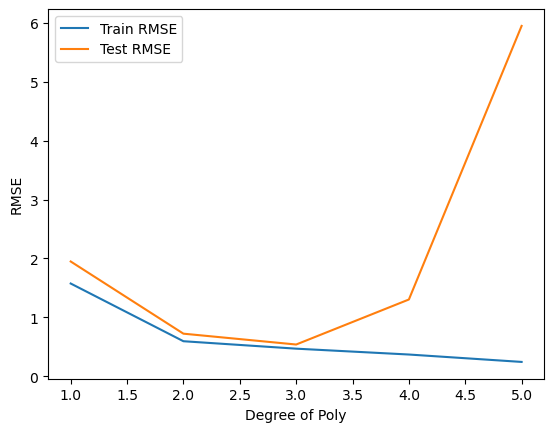

In [17]:
plt.plot(range(1,6), train_rmse_errors[:5], label='Train RMSE')
plt.plot(range(1,6), test_rmse_errors[:5], label='Test RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()
plt.show()

In [18]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)
final_model = LinearRegression()

full_convereted_X = final_poly_converter.fit_transform(X)

final_model.fit(full_convereted_X, y)

from joblib import dump, load

dump(final_poly_converter, 'final_converter.joblib')
dump(final_model, 'final_poly_model.joblib')


['final_poly_model.joblib']

In [21]:
final_model.coef_

array([ 8.96744296e-02,  3.87306507e-02,  1.40116785e-02, -4.39852533e-04,
        1.38525353e-03, -2.11551525e-04, -5.78622015e-04, -3.39038010e-04,
        2.30693236e-04,  7.62775843e-07, -1.21636828e-06,  7.24494002e-07,
        1.79932497e-06, -1.51021227e-06, -1.14841391e-07,  3.32749144e-06,
        4.93904244e-06,  2.67349509e-06, -2.30514930e-06])

In [19]:
loaded_converter = load('final_converter.joblib')
loaded_model = load('final_poly_model.joblib')

new_capaign = [[149, 22, 12]]

converted_data = loaded_converter.fit_transform(new_capaign)
loaded_model.predict(converted_data)

array([14.64501014])